In [3]:
import numpy as np
import cv2
import analogy
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

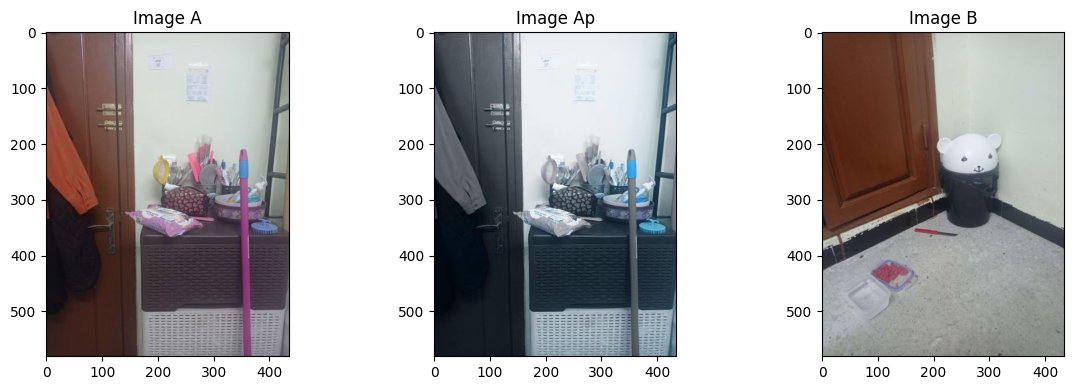

In [4]:
"""  Start User Defined Inputs  """
remap_A = 1 # est ce que on normalise la luminance ou pas 
pyr_levels = 5
kappa = 0
# method can be pyflann_kmeans, pyflann_kdtree or sk_nn, default:pyflann_kmeans
search_method = 'pyflann_kdtree'
# type can be luminance or color, most effects work with luminance. Texture synthesis works well with color
# default:luminance
type = 'color'
additional_pairs = False
# type the path of your images here. You can change the output path at the bottom
imgA, imgAp, imgB = analogy.read_images("Images/A1.jpg", "Images/Ap1.jpg", "Images/B1.jpg")

# Chargement des images
imgA = mpimg.imread("Images/A1.jpg")
imgAp = mpimg.imread("Images/Ap1.jpg")
imgB = mpimg.imread("Images/B1.jpg")

# Affichage des images sur une seule ligne
plt.figure(figsize=(12, 4))  # Ajustez la taille de la figure selon vos besoins

# Affichage de l'image imgA avec son nom
plt.subplot(131)
plt.imshow(imgA)
plt.title('Image A')

# Affichage de l'image imgAp avec son nom
plt.subplot(132)
plt.imshow(imgAp)
plt.title('Image Ap')

# Affichage de l'image imgB avec son nom
plt.subplot(133)
plt.imshow(imgB)
plt.title('Image B')

# Pour ajuster l'espacement entre les images
plt.tight_layout()

# Affichage de la figure
plt.show()

if additional_pairs:  # add/remove a line for each pair you want to cat to A and Ap for training on a single loop
    imgA, imgAp = analogy.add_pairs(imgA, imgAp, "Images/A2.jpg", "Images/Ap2.jpg")
    imgA, imgAp = analogy.add_pairs(imgA, imgAp, "Images/A3.jpg", "Images/Ap3.jpg")

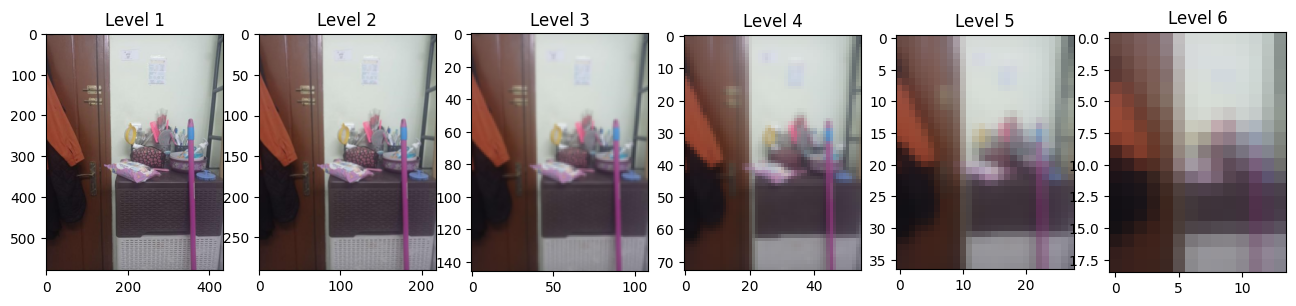

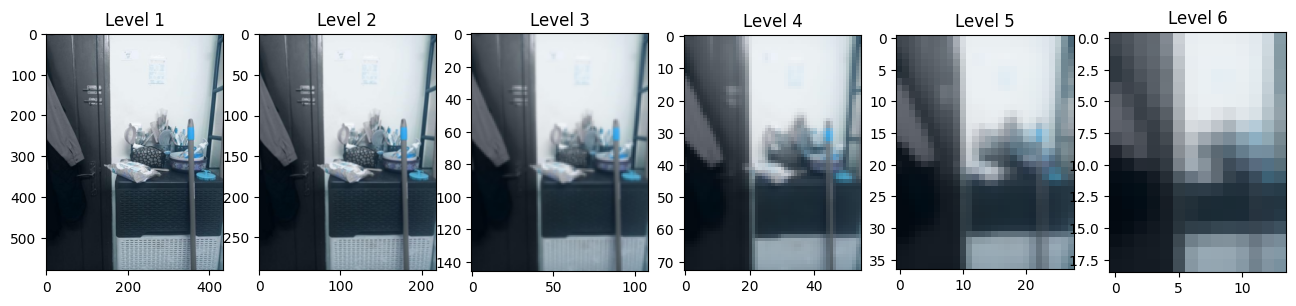

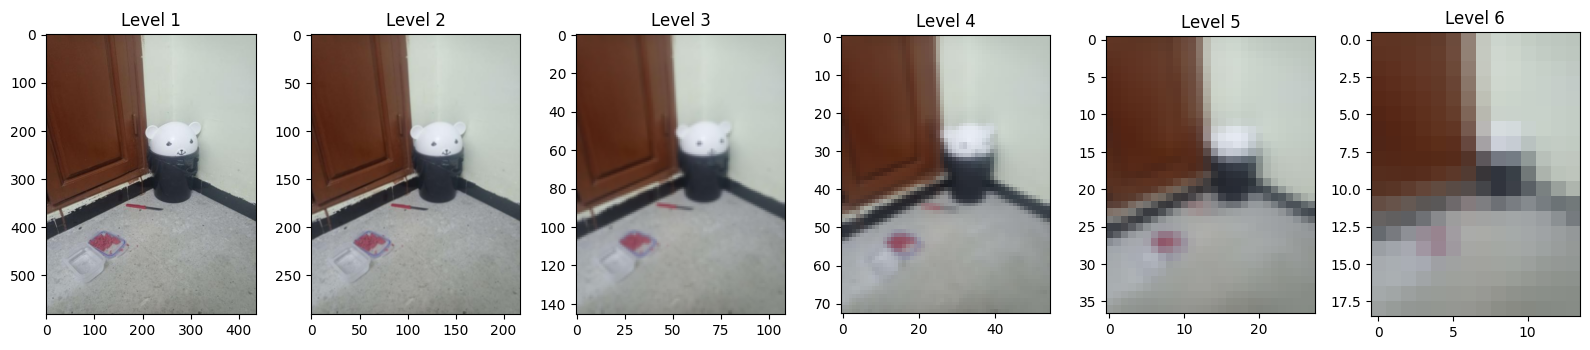

In [5]:
# initialize pyramids (denoted by _L)
if type == 'luminance': #deja la on a plusieurs img level 
    A_L = analogy.get_pyramid(analogy.rgb2yiq(imgA), pyr_levels)
    B_L = analogy.get_pyramid(analogy.rgb2yiq(imgB, feature='yiq'), pyr_levels)
    Ap_L = analogy.get_pyramid(analogy.rgb2yiq(imgAp, feature='yiq'), pyr_levels)
elif type == 'color':
    A_L = analogy.get_pyramid(imgA, pyr_levels)
    B_L = analogy.get_pyramid(imgB, pyr_levels)
    Ap_L = analogy.get_pyramid(imgAp, pyr_levels)

num_levels = len(A_L)

# Créer une figure pour afficher tous les niveaux de la pyramide
plt.figure(figsize=(16, 8))  # Ajustez la taille de la figure selon vos besoins

for level in range(num_levels):
    plt.subplot(1, num_levels, level + 1)
    plt.imshow(A_L[level], cmap='gray')  # 'cmap' dépend du type d'image (luminance ou couleur)
    plt.title(f'Level {level + 1}')

plt.figure(figsize=(16, 8))  # Ajustez la taille de la figure selon vos besoins

for level in range(num_levels):
    plt.subplot(1, num_levels, level + 1)
    plt.imshow(Ap_L[level], cmap='gray')  # 'cmap' dépend du type d'image (luminance ou couleur)
    plt.title(f'Level {level + 1}')

plt.figure(figsize=(16, 8))  
for level in range(num_levels):
    plt.subplot(1, num_levels, level + 1)
    plt.imshow(B_L[level], cmap='gray')  # 'cmap' dépend du type d'image (luminance ou couleur)
    plt.title(f'Level {level + 1}')

plt.tight_layout()
plt.show()

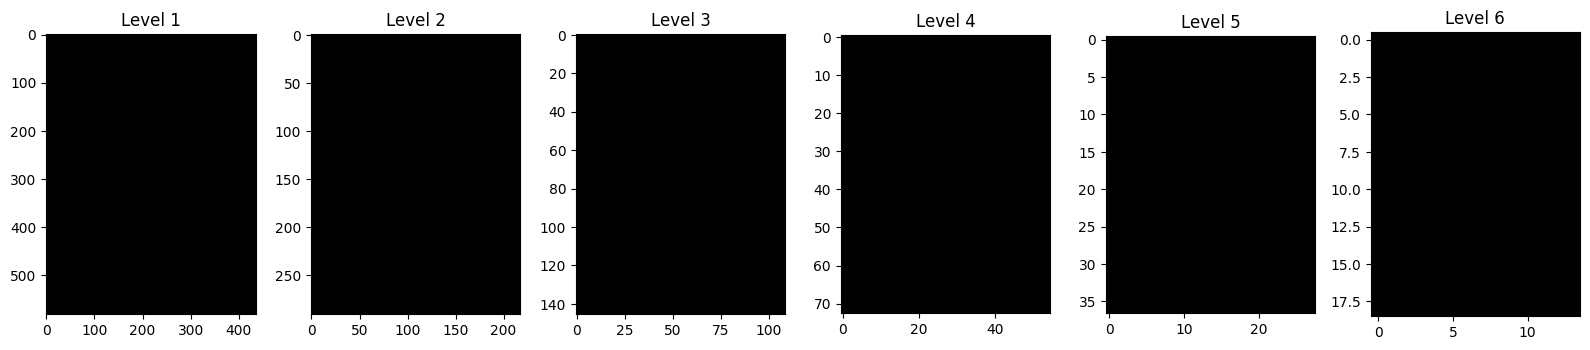

In [6]:
Bp_L = []
s = []
# this loop initializes Bp_L with empty arrays and s with arrays
#  filled with -1 for each level of the image pyramid. These arrays
#  will later be populated with 
# values as the algorithm progresses through the pyramid levels.

for i in range(len(B_L)): #each level of the pyramide 
    Bp_L.append(np.zeros(B_L[i].shape))
    s.append(np.zeros((B_L[i].shape[0],B_L[i].shape[1],2))-1)

# Create a figure to display all levels of the pyramid
plt.figure(figsize=(16, 8))  # Adjust the figure size as needed

for level in range(num_levels):
    plt.subplot(1, num_levels, level + 1)
    plt.imshow(Bp_L[level], cmap='gray')  # Use the appropriate cmap based on the content
    plt.title(f'Level {level + 1}')

plt.tight_layout()
plt.show()


Starting Level:  5 of  5
Building FLANN kdtree index for size: 9842 for A size 798
FLANN kdtree index done...
Starting Level:  4 of  5
Building FLANN kdtree index for size: 90132 for A size 3108
FLANN kdtree index done...
Rastering row 25 of 37
Starting Level:  3 of  5
Building FLANN kdtree index for size: 349305 for A size 12045
FLANN kdtree index done...
Rastering row 25 of 73
Rastering row 50 of 73
Starting Level:  2 of  5
Building FLANN kdtree index for size: 1384518 for A size 47742
FLANN kdtree index done...
Rastering row 25 of 146
Rastering row 50 of 146
Rastering row 75 of 146
Rastering row 100 of 146
Rastering row 125 of 146
Starting Level:  1 of  5
Building FLANN kdtree index for size: 5519106 for A size 190314
FLANN kdtree index done...
Rastering row 25 of 291
Rastering row 50 of 291
Rastering row 75 of 291
Rastering row 100 of 291
Rastering row 125 of 291
Rastering row 150 of 291
Rastering row 175 of 291
Rastering row 200 of 291
Rastering row 225 of 291
Rastering row 250 of

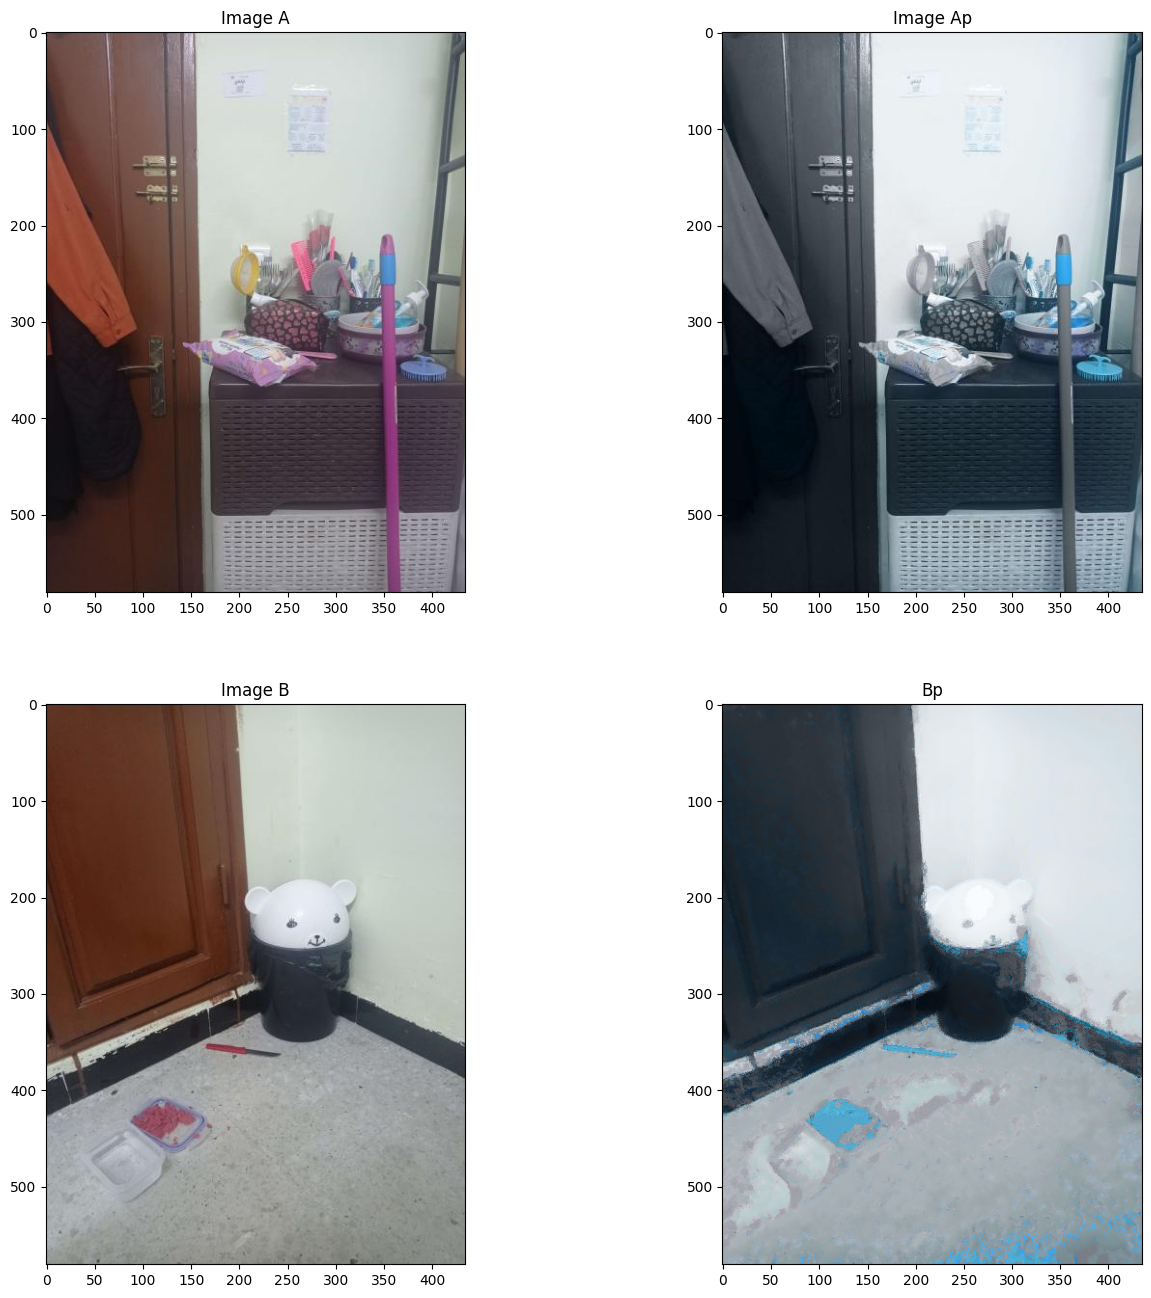

: 

In [7]:
# process pyramid from coursest to finest
for lvl in range(pyr_levels, -1, -1):
    print("Starting Level: ", lvl, "of ", pyr_levels)

    if type == 'luminance':
        Bp_L[lvl] = analogy.make_analogy(lvl, pyr_levels, A_L, Ap_L, B_L, Bp_L, s, kappa, search_method)
        Bp_int = np.uint8(Bp_L[lvl][:, :, 0].copy() * 255)
        cv2.imshow("bp", Bp_int)
        cv2.waitKey(1)
        imgBp = analogy.yiq2rgb(Bp_L[lvl])

    elif type == 'color':
        Bp_L[lvl] = analogy.make_analogy_color(lvl, pyr_levels, A_L, Ap_L, B_L, Bp_L, s, kappa, search_method)
        Bp_int = np.uint8(Bp_L[lvl].copy() * 255)
        cv2.imshow("bp", Bp_int)
        cv2.waitKey(1)
        imgBp = Bp_L[lvl]

    imgBp = imgBp * 255.0
    imgBp[imgBp > 255] = 255
    imgBp[imgBp < 0] = 0

# Create a figure with a 2x2 grid of subplots
plt.figure(figsize=(16, 16))  # Adjust the figure size as needed
# Chargement des images
imgA = mpimg.imread("Images/A1.jpg")
imgAp = mpimg.imread("Images/Ap1.jpg")
imgB = mpimg.imread("Images/B1.jpg")

# Display imgA
plt.subplot(2, 2, 1)
plt.imshow(imgA)
plt.title('Image A')

# Display imgAp
plt.subplot(2, 2, 2)
plt.imshow(imgAp)
plt.title('Image Ap')

# Display imgB
plt.subplot(2, 2, 3)
plt.imshow(imgB)
plt.title('Image B')

# Display Bp_L[lvl]
plt.subplot(2, 2, 4)
if type == 'luminance':
    plt.imshow(Bp_L[lvl][:, :, 0], cmap='gray')  # Display luminance channel with grayscale colormap
else:
    plt.imshow(Bp_L[lvl])  # Display the color image as is
plt.title(f'Bp')

plt.show()

